In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('sequence_with_lag_features_cancel_out.csv')  
df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})
df['1y_holiday_diff'] = df['1y_holiday_diff'].fillna(0)
df['lag_1_spending'] = df['lag_1_spending'].fillna(0)
df['lag_2_spending'] = df['lag_2_spending'].fillna(0)
df['lag_3_spending'] = df['lag_3_spending'].fillna(0)
df['lag_5_spending'] = df['lag_5_spending'].fillna(0)
df['lag_6_spending'] = df['lag_6_spending'].fillna(0)
df['lag_7_spending'] = df['lag_7_spending'].fillna(0)
df['lag_9_spending'] = df['lag_9_spending'].fillna(0)
df['lag_11_spending'] = df['lag_11_spending'].fillna(0)
df['lag_12_spending'] = df['lag_12_spending'].fillna(0)
df = df.drop(columns=['year_month'])
df.head(10)

C:\Users\Suzreal\AppData\Local\Temp\ipykernel_16648\4038977685.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['is_holiday'].replace({False: 0, True: 1})


,user_id,txn_count_prev,total_expense_prev,mean_amount,user_gender,user_current_age,user_yearly_income,user_per_capita_income,user_credit_score,user_total_debt,...,lag_2_spending,lag_3_spending,lag_5_spending,lag_6_spending,lag_7_spending,lag_9_spending,lag_11_spending,lag_12_spending,1y_holiday_diff,is_holiday
0,0,128.0,6185.2,53.0,0,33,59613.0,29237.0,763,36199.0,...,3859.24,6766.18,4266.63,6777.58,6604.68,5055.62,5109.56,6169.59,-1252.72,1
1,0,99.0,5249.9,49.2,0,33,59613.0,29237.0,763,36199.0,...,7091.15,3859.24,5642.49,4266.63,6777.58,7068.70,4600.44,5109.56,-739.90,1
2,0,86.0,4229.7,45.5,0,33,59613.0,29237.0,763,36199.0,...,4916.87,7091.15,6766.18,5642.49,4266.63,6604.68,5055.62,4600.44,0.00,0
3,0,101.0,4595.4,47.8,0,33,59613.0,29237.0,763,36199.0,...,4369.66,4916.87,3859.24,6766.18,5642.49,6777.58,7068.70,5055.62,0.00,0
4,0,96.0,4586.5,50.6,0,33,59613.0,29237.0,763,36199.0,...,5495.42,4369.66,7091.15,3859.24,6766.18,4266.63,6604.68,7068.70,-1420.57,1
5,0,116.0,5864.1,57.6,0,33,59613.0,29237.0,763,36199.0,...,4938.54,5495.42,4916.87,7091.15,3859.24,5642.49,6777.58,6604.68,0.00,0
6,0,106.0,6104.9,59.8,0,33,59613.0,29237.0,763,36199.0,...,5648.13,4938.54,4369.66,4916.87,7091.15,6766.18,4266.63,6777.58,-1133.53,1
7,0,92.0,5504.1,48.8,0,33,59613.0,29237.0,763,36199.0,...,5886.93,5648.13,5495.42,4369.66,4916.87,3859.24,5642.49,4266.63,0.00,0
8,0,103.0,5029.5,56.7,0,33,59613.0,29237.0,763,36199.0,...,5644.05,5886.93,4938.54,5495.42,4369.66,7091.15,6766.18,5642.49,67.42,1
9,0,94.0,5329.9,58.9,0,33,59613.0,29237.0,763,36199.0,...,5029.51,5644.05,5648.13,4938.54,5495.42,4916.87,3859.24,6766.18,-495.02,1


In [4]:
from sklearn.model_selection import train_test_split

user_ids = df['user_id'].unique()
train_users1, test_users = train_test_split(user_ids, test_size=0.2, random_state=24)
train_users, val_users = train_test_split(train_users1, test_size=0.2, random_state=24)
train_df = df[df['user_id'].isin(train_users)].copy()
test_df  = df[df['user_id'].isin(test_users)].copy()
val_df   = df[df['user_id'].isin(val_users)].copy()

print(train_df.columns)

Index(['user_id', 'txn_count_prev', 'total_expense_prev', 'mean_amount',
       'user_gender', 'user_current_age', 'user_yearly_income',
       'user_per_capita_income', 'user_credit_score', 'user_total_debt',
       'user_birth_month', 'card_num_cards_issued', 'user_latitude',
       'user_longitude', 'year_to_retirement', 'debt_to_yearly_income_ratio',
       'income_per_card', 'multi_card_user', 'income_utilization_ratio',
       'credit_utilization_ratio', 'oldest_card_age_years',
       'weekend_spend_ratio', 'correlation_with_trend',
       'risk_of_default_score', 'risk_level', 'Cluster',
       'percentage_prev_monthly_expense_as_yearly',
       'percentage_prev_monthly_expense_as_capita', 'lag_1_spending',
       'lag_2_spending', 'lag_3_spending', 'lag_5_spending', 'lag_6_spending',
       'lag_7_spending', 'lag_9_spending', 'lag_11_spending',
       'lag_12_spending', '1y_holiday_diff', 'is_holiday'],
      dtype='object')


In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'total_expense_prev','user_yearly_income','user_yearly_income',
       'user_per_capita_income','user_credit_score', 'user_total_debt','income_per_card','lag_1_spending',
       'lag_2_spending', 'lag_3_spending', 'lag_5_spending', 'lag_6_spending',
       'lag_7_spending', 'lag_9_spending', 'lag_11_spending',
       'lag_12_spending'
]
# --- normalize ---
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [6]:
import torch
from torch.utils.data import Dataset

class TransactionDataset(Dataset):
    def __init__(self, df, feature_cols, user_col='user_id', target_col='mean_amount', window_size=24):
        self.feature_cols = feature_cols
        self.user_col = user_col
        self.target_col = target_col
        self.window_size = window_size
        self.samples = []


        for uid, user_df in df.groupby(user_col):
            X = user_df[feature_cols].to_numpy(dtype=float)
            y = user_df[target_col].to_numpy(dtype=float)

            if len(user_df) <= window_size:
                continue

            for i in range(len(user_df) - window_size):
                self.samples.append((
                    X[i:i + window_size],
                    y[i + window_size]
                ))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        X, y = self.samples[idx]
        return (
            torch.tensor(X, dtype=torch.float32),
            torch.tensor(y, dtype=torch.float32)
        )


In [7]:
import torch
import torch.nn as nn

class LSTMAmountPredictor(nn.Module):
    def __init__(self, num_features, hidden_dim=128, num_layers=2, dropout=0.1):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=num_features,   
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [batch, seq_len, num_features]
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]  # [batch, hidden_dim]
        y_pred = self.fc(last_out)  # [batch, 1]
        return y_pred.squeeze(-1)


In [8]:
feature_cols = [
    'txn_count_prev', 'total_expense_prev',
       'user_gender', 'user_current_age', 'user_yearly_income',
       'user_per_capita_income', 'user_credit_score', 'user_total_debt',
       'user_birth_month', 'card_num_cards_issued', 'user_latitude',
       'user_longitude', 'year_to_retirement', 'debt_to_yearly_income_ratio',
       'income_per_card', 'multi_card_user', 'income_utilization_ratio',
       'credit_utilization_ratio', 'oldest_card_age_years',
       'weekend_spend_ratio', 'correlation_with_trend',
       'risk_of_default_score', 'risk_level', 'Cluster',
       'percentage_prev_monthly_expense_as_yearly',
       'percentage_prev_monthly_expense_as_capita', 'lag_1_spending',
       'lag_2_spending', 'lag_3_spending', 'lag_5_spending', 'lag_6_spending',
       'lag_7_spending', 'lag_9_spending', 'lag_11_spending',
       'lag_12_spending', '1y_holiday_diff', 'is_holiday'
]
dataset = TransactionDataset(df=df, feature_cols=feature_cols, window_size=12)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
X, y = next(iter(loader))
print(X.shape, y.shape)

torch.Size([32, 12, 37]) torch.Size([32])


In [9]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

num_features = X.shape[-1]
model = LSTMAmountPredictor(num_features=num_features, hidden_dim=128, num_layers=2)
# hyperparam
BATCH_SIZE = 128
EPOCHS = 30
LR = 1e-3
PATIENCE = 10   

train_dataset = TransactionDataset(df=train_df, feature_cols=feature_cols, window_size=12)
val_dataset = TransactionDataset(df=val_df,feature_cols=feature_cols, window_size=12)
test_dataset = TransactionDataset(df=test_df,feature_cols=feature_cols,window_size=12)

test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

best_val_loss = np.inf
patience_counter = 0


Epoch 1/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 453.71it/s]



📘 Epoch 01 | Train Loss: 1229.147845 | Val Loss: 584.991598 | test Loss: 684.878563
✅ Saved new best model (val_loss=584.991598)


Epoch 2/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 487.18it/s]



📘 Epoch 02 | Train Loss: 475.786646 | Val Loss: 402.478328 | test Loss: 481.811163
✅ Saved new best model (val_loss=402.478328)


Epoch 3/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 475.40it/s]



📘 Epoch 03 | Train Loss: 280.675013 | Val Loss: 219.419588 | test Loss: 279.104736
✅ Saved new best model (val_loss=219.419588)


Epoch 4/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 473.85it/s]



📘 Epoch 04 | Train Loss: 184.224529 | Val Loss: 168.898457 | test Loss: 219.467512
✅ Saved new best model (val_loss=168.898457)


Epoch 5/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 439.62it/s]



📘 Epoch 05 | Train Loss: 149.794751 | Val Loss: 147.819996 | test Loss: 196.725614
✅ Saved new best model (val_loss=147.819996)


Epoch 6/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 451.82it/s]



📘 Epoch 06 | Train Loss: 133.216871 | Val Loss: 130.902269 | test Loss: 176.271340
✅ Saved new best model (val_loss=130.902269)


Epoch 7/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 456.69it/s]



📘 Epoch 07 | Train Loss: 122.100711 | Val Loss: 122.348147 | test Loss: 163.158935
✅ Saved new best model (val_loss=122.348147)


Epoch 8/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 413.23it/s]



📘 Epoch 08 | Train Loss: 115.751334 | Val Loss: 117.621045 | test Loss: 159.880564
✅ Saved new best model (val_loss=117.621045)


Epoch 9/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 395.63it/s]



📘 Epoch 09 | Train Loss: 109.237005 | Val Loss: 109.893386 | test Loss: 149.131561
✅ Saved new best model (val_loss=109.893386)


Epoch 10/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 382.16it/s]



📘 Epoch 10 | Train Loss: 106.893425 | Val Loss: 108.501766 | test Loss: 145.290024
✅ Saved new best model (val_loss=108.501766)


Epoch 11/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 438.30it/s]



📘 Epoch 11 | Train Loss: 102.619041 | Val Loss: 107.588988 | test Loss: 145.322017
✅ Saved new best model (val_loss=107.588988)


Epoch 12/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 437.15it/s]



📘 Epoch 12 | Train Loss: 100.354185 | Val Loss: 103.664273 | test Loss: 135.433403
✅ Saved new best model (val_loss=103.664273)


Epoch 13/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 431.13it/s]



📘 Epoch 13 | Train Loss: 98.807980 | Val Loss: 103.533686 | test Loss: 133.831925
✅ Saved new best model (val_loss=103.533686)


Epoch 14/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 433.83it/s]



📘 Epoch 14 | Train Loss: 97.408126 | Val Loss: 106.499542 | test Loss: 135.262276
 No improvement (1/10)


Epoch 15/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 495.57it/s]



📘 Epoch 15 | Train Loss: 96.897262 | Val Loss: 101.830504 | test Loss: 131.025333
✅ Saved new best model (val_loss=101.830504)


Epoch 16/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 464.76it/s]



📘 Epoch 16 | Train Loss: 95.146163 | Val Loss: 101.892241 | test Loss: 129.335421
 No improvement (1/10)


Epoch 17/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 467.38it/s]



📘 Epoch 17 | Train Loss: 94.579122 | Val Loss: 111.307017 | test Loss: 138.090260
 No improvement (2/10)


Epoch 18/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 449.16it/s]



📘 Epoch 18 | Train Loss: 94.169510 | Val Loss: 104.391315 | test Loss: 129.967693
 No improvement (3/10)


Epoch 19/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 447.12it/s]



📘 Epoch 19 | Train Loss: 92.398229 | Val Loss: 103.061860 | test Loss: 129.037306
 No improvement (4/10)


Epoch 20/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 495.42it/s]



📘 Epoch 20 | Train Loss: 92.600229 | Val Loss: 102.274264 | test Loss: 128.301607
 No improvement (5/10)


Epoch 21/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 458.31it/s]



📘 Epoch 21 | Train Loss: 91.165126 | Val Loss: 103.129946 | test Loss: 127.516262
 No improvement (6/10)


Epoch 22/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 444.54it/s]



📘 Epoch 22 | Train Loss: 90.530271 | Val Loss: 102.659212 | test Loss: 127.126012
 No improvement (7/10)


Epoch 23/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 424.80it/s]



📘 Epoch 23 | Train Loss: 90.286379 | Val Loss: 101.524621 | test Loss: 124.969638
✅ Saved new best model (val_loss=101.524621)


Epoch 24/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 456.33it/s]



📘 Epoch 24 | Train Loss: 89.818143 | Val Loss: 104.507857 | test Loss: 128.423143
 No improvement (1/10)


Epoch 25/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 439.28it/s]



📘 Epoch 25 | Train Loss: 89.101868 | Val Loss: 101.111150 | test Loss: 123.462078
✅ Saved new best model (val_loss=101.111150)


Epoch 26/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 456.27it/s]



📘 Epoch 26 | Train Loss: 89.286543 | Val Loss: 102.261066 | test Loss: 126.845083
 No improvement (1/10)


Epoch 27/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 430.16it/s]



📘 Epoch 27 | Train Loss: 88.741181 | Val Loss: 102.446485 | test Loss: 122.633006
 No improvement (2/10)


Epoch 28/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 461.01it/s]



📘 Epoch 28 | Train Loss: 88.162185 | Val Loss: 103.943206 | test Loss: 125.510589
 No improvement (3/10)


Epoch 29/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 450.44it/s]



📘 Epoch 29 | Train Loss: 87.761654 | Val Loss: 101.414807 | test Loss: 123.350209
 No improvement (4/10)


Epoch 30/30 [Val]: 100%|██████████| 88/88 [00:00<00:00, 458.64it/s]



📘 Epoch 30 | Train Loss: 87.185721 | Val Loss: 101.392557 | test Loss: 124.826871
 No improvement (5/10)


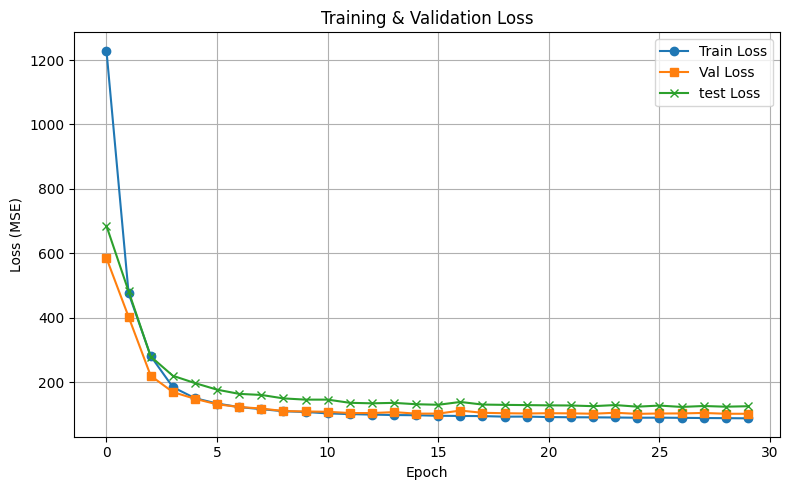

In [10]:
train_history = {"train_loss": [], "val_loss": [],"test_loss":[]}
for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X).squeeze()  # (batch,)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    avg_train_loss = np.mean(train_losses)

    model.eval()
    val_losses = []
    with torch.no_grad():
        for X, y in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            loss = criterion(preds, y)
            val_losses.append(loss.item())

    avg_val_loss = np.mean(val_losses)
    test_losses = []
    with torch.no_grad():
        for X, y in tqdm(test_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            loss = criterion(preds, y)
            test_losses.append(loss.item())

    avg_test_loss = np.mean(test_losses)

    train_history["train_loss"].append(avg_train_loss)
    train_history["val_loss"].append(avg_val_loss)
    train_history["test_loss"].append(avg_test_loss)

    print(f"\n📘 Epoch {epoch+1:02d} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f} | test Loss: {avg_test_loss:.6f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_lstm_model.pt")
        print(f"✅ Saved new best model (val_loss={best_val_loss:.6f})")
    else:
        patience_counter += 1
        print(f" No improvement ({patience_counter}/{PATIENCE})")
        if patience_counter >= PATIENCE:
            print("⏹️ Early stopping triggered")
            break


plt.figure(figsize=(8, 5))
plt.plot(train_history["train_loss"], label="Train Loss", marker="o")
plt.plot(train_history["val_loss"], label="Val Loss", marker="s")
plt.plot(train_history["test_loss"], label="test Loss", marker='x')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model.load_state_dict(torch.load("best_lstm_model.pt"))
model.to(device)
model.eval()

def evaluate_model(loader, model, device):
    y_true, y_pred = [], []
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            preds = model(X).squeeze()
            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100  

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}


val_metrics = evaluate_model(val_loader, model, device)
print("\n📊 Validation Set Metrics:")
for k, v in val_metrics.items():
    print(f"  {k}: {v:.6f}")

test_metrics = evaluate_model(test_loader, model, device)
print("\n📊 Test Set Metrics:")
for k, v in test_metrics.items():
    print(f"  {k}: {v:.6f}")


C:\Users\Suzreal\AppData\Local\Temp\ipykernel_16648\2330783964.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_lstm_model.pt"))



📊 Validation Set Metrics:
  MAE: 7.010835
  MSE: 101.105576
  RMSE: 10.055127
  MAPE: 15.782493

📊 Test Set Metrics:
  MAE: 7.159130
  MSE: 118.415787
  RMSE: 10.881902
  MAPE: 15.729126
